In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
import joblib
from sklearn import set_config
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans



file_path = r"C:\Clustering ML project\data\raw\Cleaned_Data_Merchant_Level_2.csv"
df = pd.read_csv(file_path)

df.head()



,User_Id,Customer_Age,Trx_Vlu,Trx_Age,Trx_Rank,Points,Category In English,Mer_Id
0,21053,362,2014.0,362,1,20140,Fashion,0
1,26472,368,1120.0,371,1,11200,Fashion,0
2,26472,368,850.0,368,2,8500,Fashion,0
3,27075,34,198.0,558,1,1980,Fashion,0
4,27417,413,240.0,413,1,2400,Fashion,0


In [47]:
sample_df = df.sample(10, random_state=42)
sample_df.to_csv("sample_data.csv", index=False)



In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43672 entries, 0 to 43671
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User_Id              43672 non-null  int64  
 1   Customer_Age         43672 non-null  int64  
 2   Trx_Vlu              43672 non-null  float64
 3   Trx_Age              43672 non-null  int64  
 4   Trx_Rank             43672 non-null  int64  
 5   Points               43672 non-null  int64  
 6   Category In English  43672 non-null  object 
 7   Mer_Id               43672 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 2.7+ MB


In [49]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)
def check_missing(df):
    return df.isna().sum()

check_missing(df)


user_id                0
customer_age           0
trx_vlu                0
trx_age                0
trx_rank               0
points                 0
category_in_english    0
mer_id                 0
dtype: int64

In [53]:
non_negative_cols = [
    "customer_age",
    "trx_age",
    "trx_vlu",
    "points"
]

for col in non_negative_cols:
    neg_count = (df[col] < 0).sum()
    print(f"{col}: {neg_count} negative values")


customer_age: 0 negative values
trx_age: 0 negative values
trx_vlu: 0 negative values
points: 0 negative values


In [54]:
df.duplicated().sum()


np.int64(0)

In [55]:
df["category_in_english"].value_counts()


category_in_english
Grocery            30694
F&B                 7720
Fashion             3333
Health & Beauty     1504
Electronics          228
Transportaion        146
Other                 47
Name: count, dtype: int64

In [56]:
df["category_in_english"].unique()


array(['Fashion', 'F&B', 'Other', 'Grocery', 'Transportaion',
       'Electronics', 'Health & Beauty'], dtype=object)

In [57]:
np.isinf(df.select_dtypes(include="number")).sum()



user_id         0
customer_age    0
trx_vlu         0
trx_age         0
trx_rank        0
points          0
mer_id          0
dtype: int64

In [58]:
df["category_in_english"].isna().sum()
df["category_in_english"].str.strip().eq("").sum()


np.int64(0)

In [59]:
df.dtypes


user_id                  int64
customer_age             int64
trx_vlu                float64
trx_age                  int64
trx_rank                 int64
points                   int64
category_in_english     object
mer_id                   int64
dtype: object

In [60]:
(df[["trx_vlu", "points"]] == 0).sum()


trx_vlu    0
points     0
dtype: int64

In [61]:
df.describe()

,user_id,customer_age,trx_vlu,trx_age,trx_rank,points,mer_id
count,43672.000000,43672.000000,43672.000000,43672.000000,43672.000000,43672.000000,43672.000000
mean,17173.411889,144.027844,331.224975,185.186664,1.265227,3312.249748,16.277111
std,9665.399084,114.764448,575.637414,121.989540,0.776549,5756.374137,16.099288
min,0.000000,1.000000,2.000000,1.000000,1.000000,20.000000,0.000000
25%,8710.750000,34.000000,122.000000,62.000000,1.000000,1220.000000,8.000000
50%,17561.000000,115.000000,189.350000,203.000000,1.000000,1893.500000,8.000000
75%,25634.250000,252.000000,310.000000,271.000000,1.000000,3100.000000,26.000000
max,33518.000000,682.000000,26380.000000,698.000000,17.000000,263800.000000,56.000000


In [62]:
# Inspect rows with zero IDs
df.loc[df["user_id"] == 0].head()


,user_id,customer_age,trx_vlu,trx_age,trx_rank,points,category_in_english,mer_id
7083,0,281,442.7,281,1,4427,F&B,7


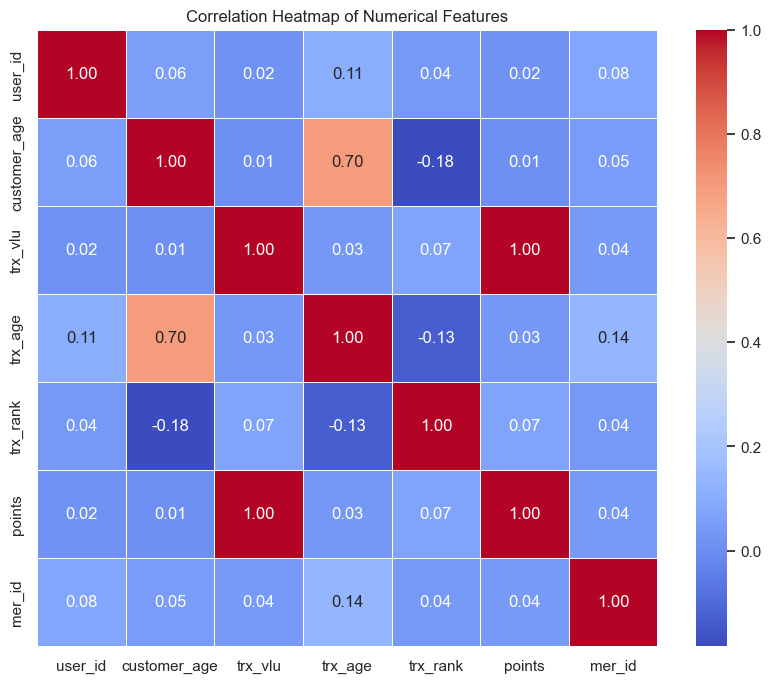

In [63]:
num_df = df.select_dtypes(include=["int64", "int32", "float64"])
corr = num_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [64]:
#Recommendation drop points or trx_valu beacuse of redudncancy

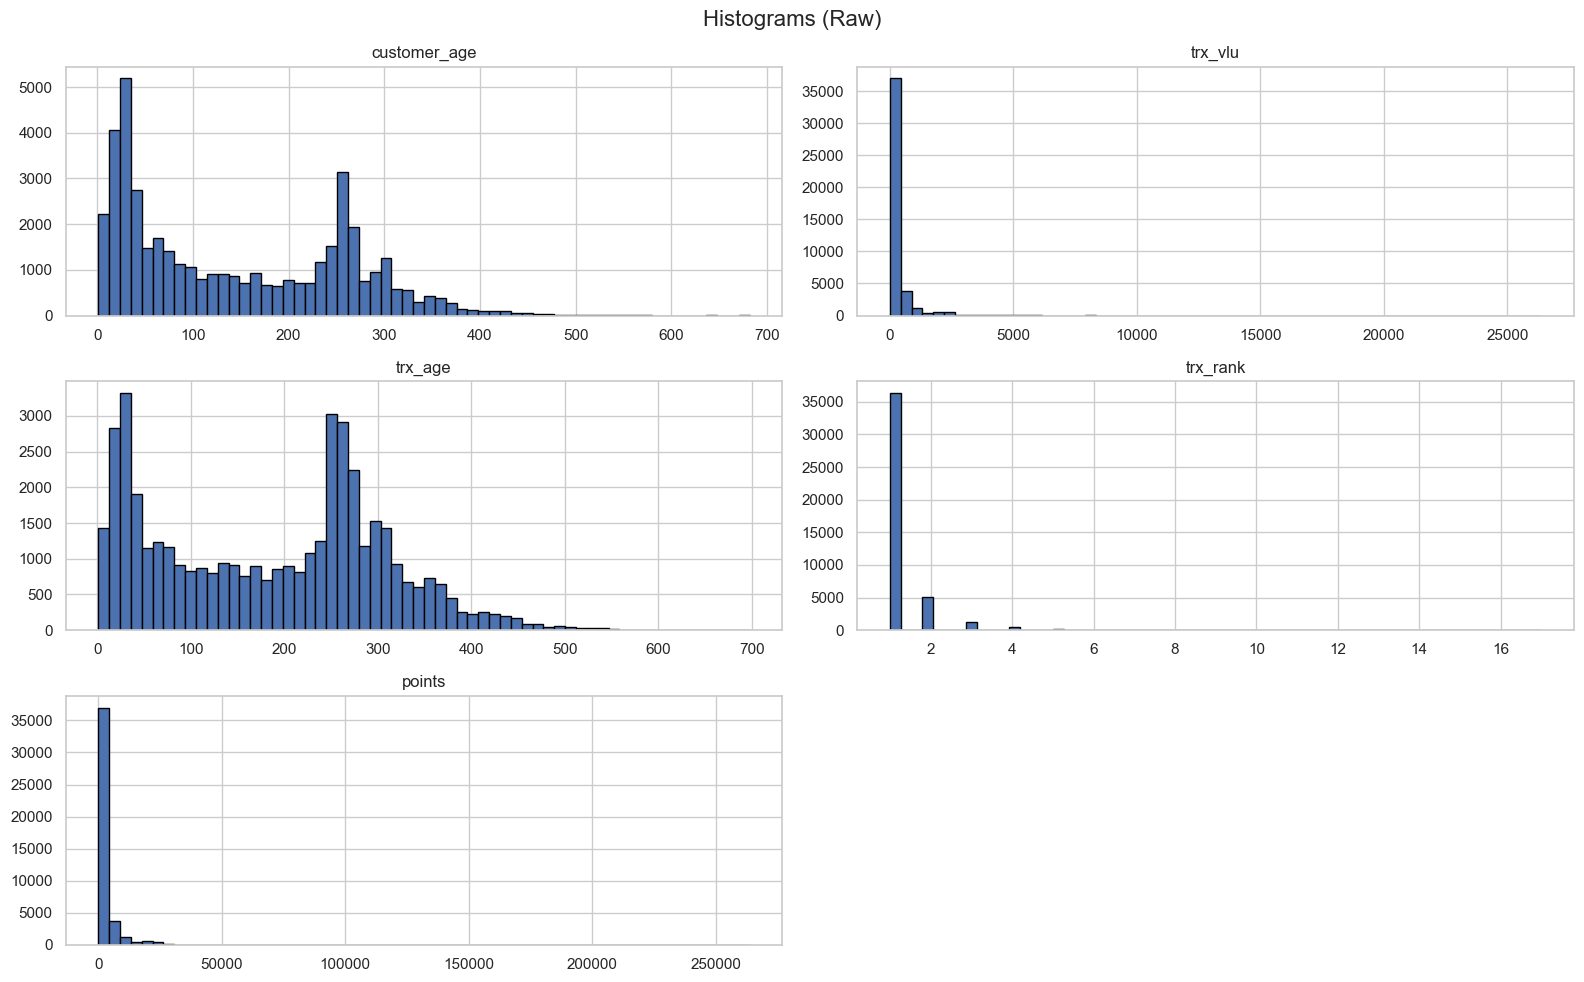

In [65]:
sns.set(style="whitegrid")

# df already loaded
num_cols = ["customer_age", "trx_vlu", "trx_age", "trx_rank", "points"]
id_cols = ["user_id", "mer_id"]
df[num_cols].hist(bins=60, figsize=(16,10), edgecolor="black")
plt.suptitle("Histograms (Raw)", fontsize=16)
plt.tight_layout()
plt.show()


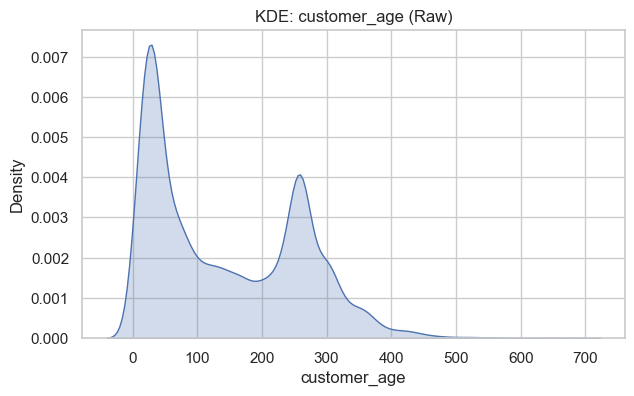

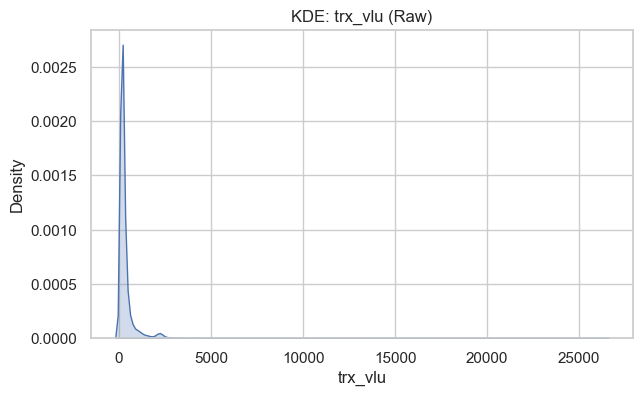

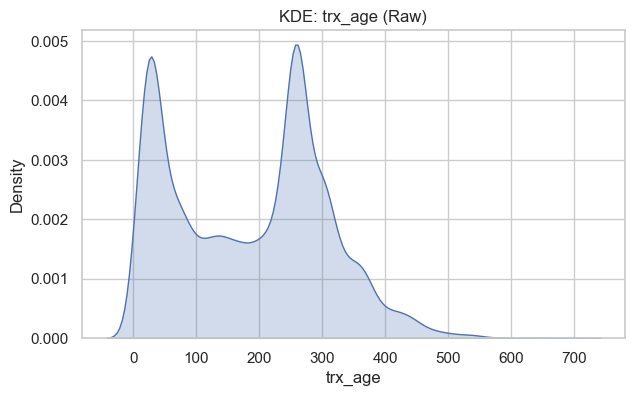

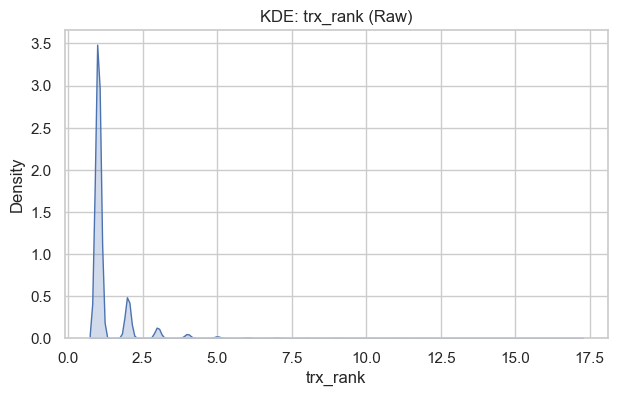

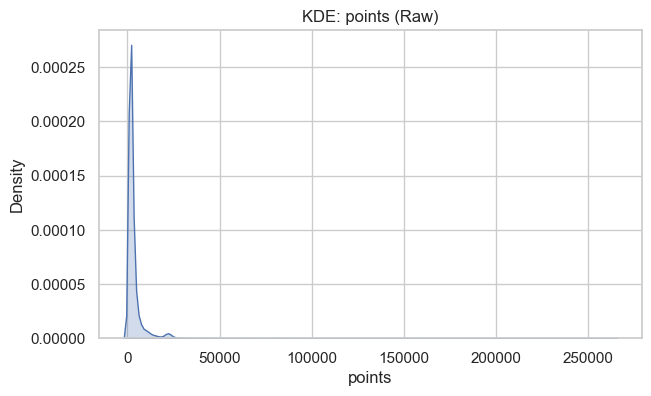

In [66]:
for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.kdeplot(df[col], fill=True)
    plt.title(f"KDE: {col} (Raw)")
    plt.show()


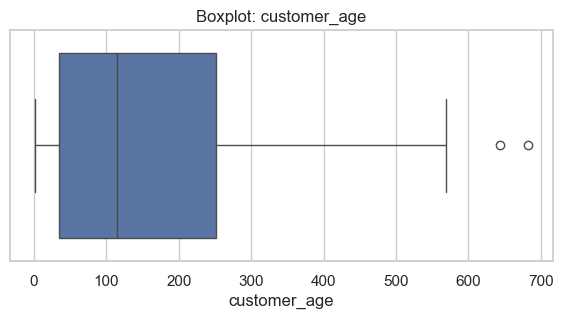

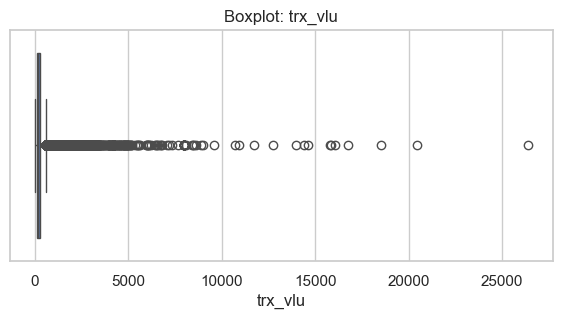

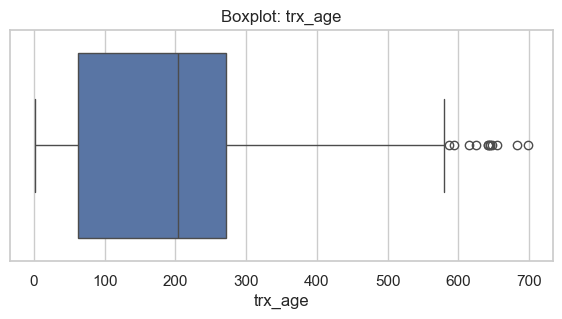

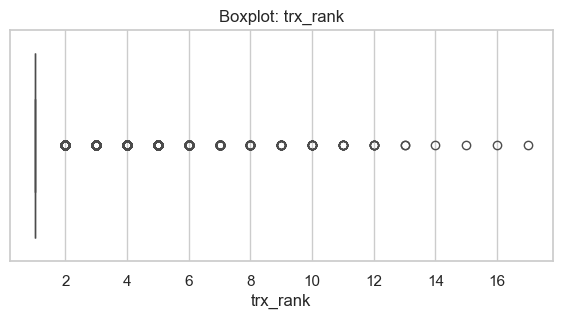

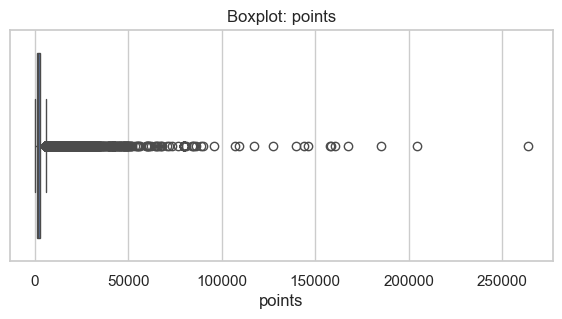

In [67]:
for col in num_cols:
    plt.figure(figsize=(7,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot: {col}")
    plt.show()


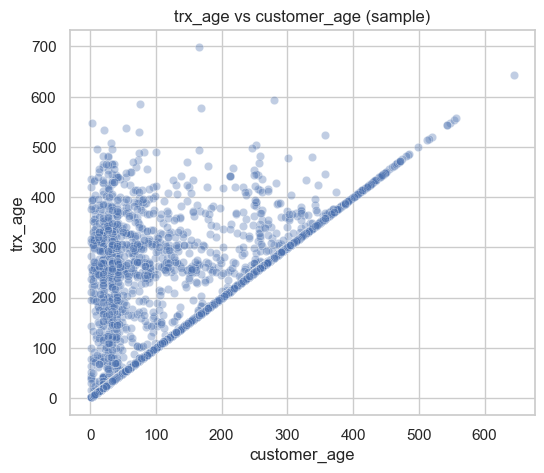

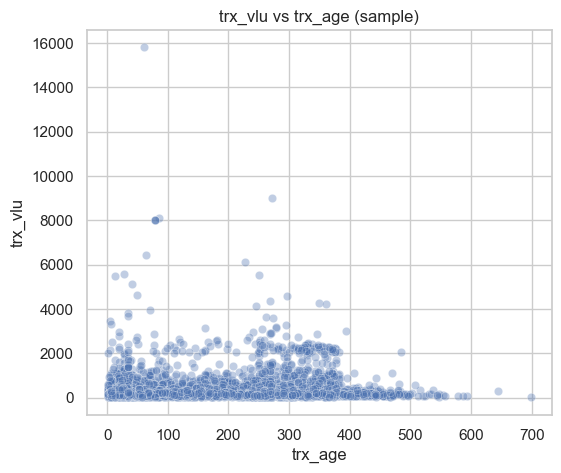

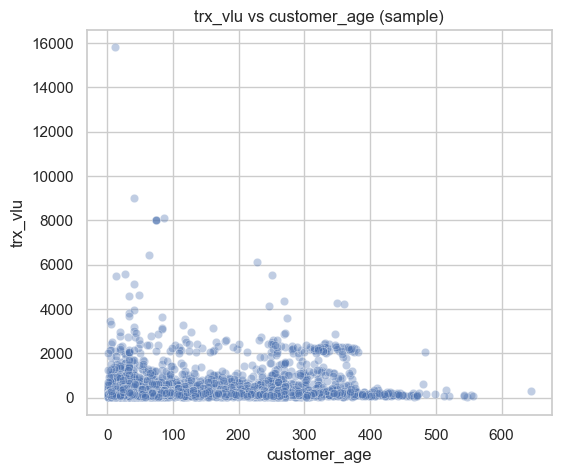

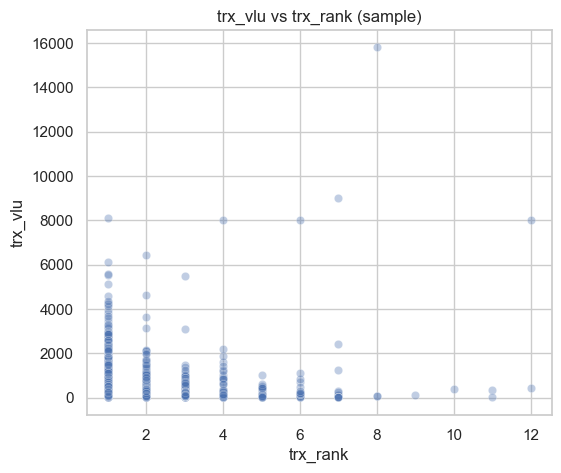

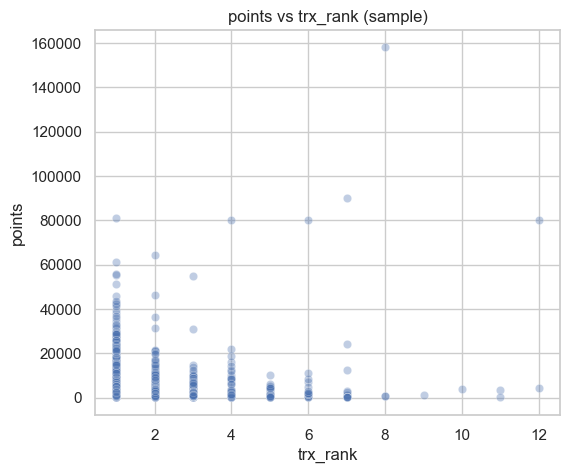

In [68]:
sample = df.sample(min(6000, len(df)), random_state=42)

pairs = [
    ("customer_age", "trx_age"),
    ("trx_age", "trx_vlu"),
    ("customer_age", "trx_vlu"),
    ("trx_rank", "trx_vlu"),
    ("trx_rank", "points"),
]

for x, y in pairs:
    plt.figure(figsize=(6,5))
    sns.scatterplot(data=sample, x=x, y=y, alpha=0.35)
    plt.title(f"{y} vs {x} (sample)")
    plt.show()


In [69]:
df["value_recency"] = df["trx_vlu"] / (df["trx_age"] + 1)
df.head()


,user_id,customer_age,trx_vlu,trx_age,trx_rank,points,category_in_english,mer_id,value_recency
0,21053,362,2014.0,362,1,20140,Fashion,0,5.548209
1,26472,368,1120.0,371,1,11200,Fashion,0,3.010753
2,26472,368,850.0,368,2,8500,Fashion,0,2.303523
3,27075,34,198.0,558,1,1980,Fashion,0,0.354204
4,27417,413,240.0,413,1,2400,Fashion,0,0.579710


In [70]:
df_ready = df.drop(columns=["points"], errors="ignore")  # drop redundant
df_ready.to_csv(
    r"C:\Clustering ML project\data\preprocessed\df_ready.csv",
    index=False
)


In [71]:
df.head()

,user_id,customer_age,trx_vlu,trx_age,trx_rank,points,category_in_english,mer_id,value_recency
0,21053,362,2014.0,362,1,20140,Fashion,0,5.548209
1,26472,368,1120.0,371,1,11200,Fashion,0,3.010753
2,26472,368,850.0,368,2,8500,Fashion,0,2.303523
3,27075,34,198.0,558,1,1980,Fashion,0,0.354204
4,27417,413,240.0,413,1,2400,Fashion,0,0.579710


In [72]:
sample_df2 = df.sample(10, random_state=42)
sample_df2.to_csv("sample_data2.csv", index=False)

In [73]:

df_original = df.copy()

In [74]:
df_model = df.drop(columns=["user_id", "mer_id", "points"], errors="ignore").copy()


In [76]:
df_model.duplicated().sum()


np.int64(2756)

In [77]:
df.loc[df_model.duplicated(), ["user_id"]].nunique()


user_id    2751
dtype: int64

In [78]:
num_cols = df_model.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df_model.select_dtypes(exclude=[np.number]).columns.tolist()

robust_cols = [c for c in ["trx_vlu"] if c in num_cols]
standard_cols = [c for c in num_cols if c not in robust_cols]

numeric_robust = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler())
])

numeric_standard = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=True))
])

preprocess = ColumnTransformer([
    ("num_robust", numeric_robust, robust_cols),
    ("num_std", numeric_standard, standard_cols),
    ("cat", categorical_pipe, cat_cols),
], remainder="drop")

X = preprocess.fit_transform(df_model)

In [79]:
df_model.to_csv("df_model.csv", index=False)


joblib.dump(preprocess, "preprocess.joblib")
display(preprocess)


,transformers,"[('num_robust', ...), ('num_std', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [80]:
X.shape


(43672, 12)

In [34]:
kmeans_results = []

for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)

    kmeans_results.append((k, score))

kmeans_results

[(2, 0.7544879305560253),
 (3, 0.3037661929716567),
 (4, 0.323302795100189),
 (5, 0.318286477066355),
 (6, 0.32370687237653667),
 (7, 0.32571741768241463),
 (8, 0.32707702931067684),
 (9, 0.3088470308441549),
 (10, 0.28656774857371714)]

In [35]:
from sklearn.mixture import GaussianMixture

gmm_results = []

for k in range(2, 11):
    model = GaussianMixture(n_components=k, random_state=42)
    labels = model.fit_predict(X)
    sil = silhouette_score(X, labels)
    gmm_results.append((k, sil))

gmm_results

[(2, 0.5784426735304135),
 (3, 0.20243030715688662),
 (4, 0.14952759902401389),
 (5, 0.183642362641211),
 (6, 0.18152135731137253),
 (7, 0.11864204388102327),
 (8, 0.09983136516144729),
 (9, 0.09326619216875236),
 (10, 0.07132704563400082)]

In [36]:
from sklearn.cluster import DBSCAN

dbscan_results = []

for eps in [0.3, 0.5, 0.7, 1.0]:
    model = DBSCAN(eps=eps, min_samples=10)
    labels = model.fit_predict(X)

    noise_pct = (labels == -1).mean() * 100
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    if n_clusters > 1 and noise_pct < 90:
        sil = silhouette_score(X[labels != -1], labels[labels != -1])
    else:
        sil = np.nan

    dbscan_results.append((eps, n_clusters, noise_pct, sil))

dbscan_results

[(0.3, 50, np.float64(13.663216706356476), -0.14823201096962327),
 (0.5, 34, np.float64(7.121267631434329), -0.08894832162147495),
 (0.7, 23, np.float64(4.318556512181718), -0.003991015622705928),
 (1.0, 29, np.float64(2.788972339256274), -0.02492606106319661)]

In [84]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, random_state=42, n_init="auto")
df["cluster"] = kmeans.fit_predict(X)

In [85]:
import os
import joblib


model_path = r"C:\Clustering ML project\models"
os.makedirs(model_path, exist_ok=True)


# save silhouette results
joblib.dump(
    kmeans_results,
    r"C:\Clustering ML project\models\kmeans_results.pkl"
)

# train & save final KMeans model (k=7)
kmeans_final = KMeans(n_clusters=7, random_state=42, n_init="auto")
kmeans_final.fit(X)

joblib.dump(
    kmeans_final,
    r"C:\Clustering ML project\models\kmeans_model_k7.pkl"
)


['C:\\Clustering ML project\\models\\kmeans_model_k7.pkl']

In [94]:
df.head()

,user_id,customer_age,trx_vlu,trx_age,trx_rank,points,category_in_english,mer_id,value_recency,cluster
0,21053,362,2014.0,362,1,20140,Fashion,0,5.548209,2
1,26472,368,1120.0,371,1,11200,Fashion,0,3.010753,4
2,26472,368,850.0,368,2,8500,Fashion,0,2.303523,4
3,27075,34,198.0,558,1,1980,Fashion,0,0.354204,1
4,27417,413,240.0,413,1,2400,Fashion,0,0.579710,1


In [90]:
# df MUST already contain: user_id, mer_id, cluster

def recommend_merchants(user_id, top_n=5):
    user_cluster = df.loc[df["user_id"] == user_id, "cluster"].iloc[0]

    recommended_merchants = (
        df[df["cluster"] == user_cluster]
        .groupby("mer_id")
        .size()
        .sort_values(ascending=False)
        .head(top_n)
        .index
        .tolist()
    )

    return recommended_merchants


# ===== EXAMPLE USAGE =====
example_user_id = 456

recommended_merchants = recommend_merchants(example_user_id)

print("User:", example_user_id)
print("Recommended merchant IDs:", recommended_merchants)


User: 456
Recommended merchant IDs: [8, 3, 54, 29, 7]


In [95]:
df[df["user_id"] == 500]


,user_id,customer_age,trx_vlu,trx_age,trx_rank,points,category_in_english,mer_id,value_recency,cluster
33201,500,82,338.0,82,1,3380,Fashion,29,4.072289,0


In [96]:
df.loc[df["user_id"] == 500, ["mer_id", "category_in_english"]]


,mer_id,category_in_english
33201,29,Fashion


In [97]:
df.loc[df["user_id"] == 500, ["mer_id", "category_in_english"]].drop_duplicates()


,mer_id,category_in_english
33201,29,Fashion


In [98]:
df[df["user_id"] == 500].groupby("category_in_english").size().sort_values(ascending=False)


category_in_english
Fashion    1
dtype: int64

In [104]:
df[df["mer_id"] == 7]["category_in_english"].value_counts()


category_in_english
F&B    3387
Name: count, dtype: int64